In [7]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import string
#this will allow the plot to be inline in the browser
%matplotlib inline

## The data is a Multigraph, we need this function to avoid multiple edges

In [8]:
def fromMulti_to_Single(G):
    H = nx.Graph()
    for u,v,d in G.edges(data=True):
        H.add_edge(u,v)
    return H

## This part reads all the files and save propoerties (num nodes, path length and clustering coefficient)

In [9]:
g = nx.Graph()
fnames=[]
node_num=[]
path='comm32.net';
g=nx.read_pajek(path)

## Read in Sorted order and Calculate avg C and avg Shortest Path Length 

In [11]:
pathlength=[]
clustering=[]
k = []
node_num=[]
##### We will analyze the largest connected component
H=fromMulti_to_Single(g)
clustering.append(nx.average_clustering(H))
G = max(nx.connected_component_subgraphs(H), key=len)
node_num.append(nx.number_of_nodes(G))
pathlength.append(nx.average_shortest_path_length(G))
k.append(np.mean(dict(nx.degree(H)).values()))

In [12]:
print "School Data, Nodes = ",node_num[0],"CC =",clustering[0],"<k>=",k[0],"<l>=",pathlength[0]

School Data, Nodes =  854 CC = 0.162606853725 <k>= 7.99767981439 <l>= 4.00686377601


## Compare with analytical approximations

In [13]:
print "RG analytical approximation <l>= ",np.log(node_num[0])/np.log(k[0])

RG analytical approximation <l>=  3.2464836114


In [14]:
print "RG analytical approximation CC=",k[0]/node_num[0]

RG analytical approximation CC= 0.00936496465385


Note 20 times more triangles in the Social Network than in a RG with similar <k> and N

## Compare with a similar Random Graph model

In [15]:
rg = nx.fast_gnp_random_graph(node_num[0],k[0]/node_num[0])
RG = max(nx.connected_component_subgraphs(rg), key=len)

In [16]:
print "Random Graph model, N=",nx.number_of_nodes(RG),"k=",np.mean(dict(nx.degree(RG)).values()),"CC=",nx.average_clustering(RG),"<l>=",nx.average_shortest_path_length(RG)

Random Graph model, N= 853 k= 7.99062133646 CC= 0.0105554547438 <l>= 3.4866942963


## Compare with a similar Random Graph model

In [17]:
pSW=0.1

In [18]:
sw = nx.watts_strogatz_graph(node_num[0],8,pSW)
SW = max(nx.connected_component_subgraphs(sw), key=len)
Csw=nx.average_clustering(SW)
lsw=nx.average_shortest_path_length(SW)

In [19]:
print "N_{SW}=",nx.number_of_nodes(SW),"k=",np.mean(dict(nx.degree(SW)).values()),"CC=",Csw,"<l>=",lsw

N_{SW}= 854 k= 8.0 CC= 0.471671887831 <l>= 4.94797257784


## QUESTION: HOW CAN WE CHOOSE pSW to match pSW?

We use the analytical approximation that we did not prove but compared in SW_Model.ipynb
This is:

$$
C_{SW}(p) \approx C(0)(1-p)^3
$$

We write the desired C and find p:

$$
p = 1-(C/C(0))^{1/3}
$$

In [20]:
C0=nx.average_clustering(nx.watts_strogatz_graph(node_num[0],8,0))  ##C(0) C of watts strogatz graph with p=0
C=clustering[0] ##desired C from Data
pSW = 1 -  math.pow(C/C0,1.0/3.0)

In [21]:
pSW

0.3675763180124251

In [22]:
sw = nx.watts_strogatz_graph(node_num[0],8,pSW)
SW = max(nx.connected_component_subgraphs(sw), key=len)
Csw=nx.average_clustering(SW)
lsw=nx.average_shortest_path_length(SW)

In [23]:
print "SW network model with similar CC and k, N_{SW}=",nx.number_of_nodes(SW),"k=",np.mean(dict(nx.degree(SW)).values()),"CC=",Csw,"<l>=",lsw

SW network model with similar CC and k, N_{SW}= 854 k= 8.0 CC= 0.168991813547 <l>= 3.77422295192


(-1.1612928837537766,
 0.97328421771526341,
 -0.89795668065547951,
 1.1803488248586653)

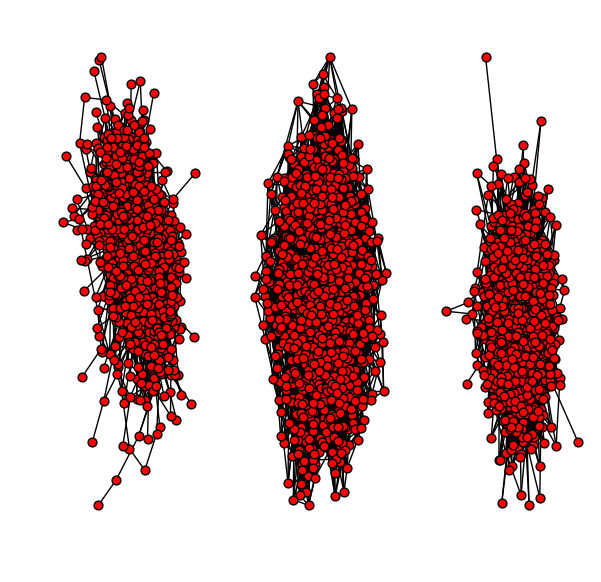

In [24]:
fig = plt.figure(figsize=(7,7))
plt.subplot(1,3,1)
nx.draw(G,node_size =40); plt.axis('tight')
plt.subplot(1,3,2)
nx.draw(SW ,node_size =40); plt.axis('tight')
plt.subplot(1,3,3)
nx.draw(RG,node_size =40); plt.axis('tight')

In [25]:
posS = nx.spring_layout(G ,iterations =1000)

In [26]:
posSW = nx.spring_layout(SW ,iterations =1000)

In [27]:
posRG = nx.spring_layout(RG ,iterations =1000)

(-1.2001433888077735,
 1.1062709012627601,
 -1.133452611863613,
 1.1502986130118369)

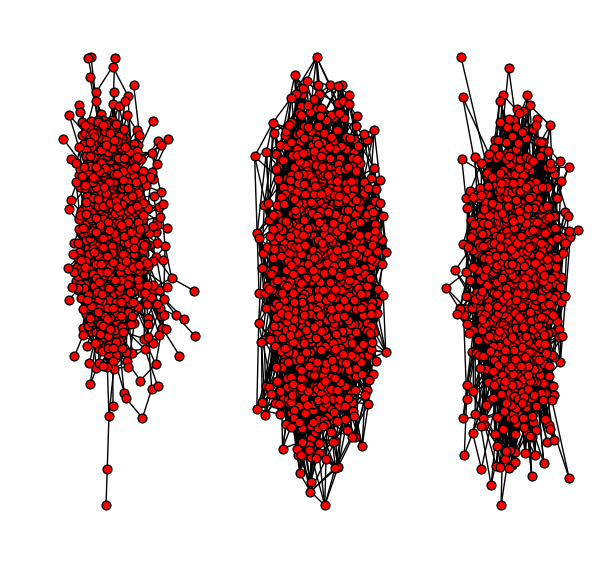

In [73]:
fig = plt.figure(figsize=(7,7))
plt.subplot(1,3,1)
nx.draw(G,pos=posS,node_size =40); plt.axis('tight')
plt.subplot(1,3,2)
nx.draw(SW,pos=posSW,node_size =40); plt.axis('tight')
plt.subplot(1,3,3)
nx.draw(RG,pos=posRG,node_size =40); plt.axis('tight')